In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import random as rd
import math as mt
import json as js

In [24]:
def decision_graph(param_x, labels, classifier):
    markers = ["x", "o", "s", "v", "^"]
    colors = ["green", "red", "blue", "gray"]
    cmaps = mcolors.ListedColormap(colors[:len(colors)])

    xx1_param_grid, xx2_param_grid = np.meshgrid(np.linspace(param_x[:, 0].min() - 1, param_x[:, 1].max() + 1),
                                                 np.linspace(param_x[:, 1].min() - 1, param_x[:, 1].max() + 1))
    result_param_grid = classifier.predict(np.array([xx1_param_grid.ravel(), xx2_param_grid.ravel()]).T)
    result_param_grid = result_param_grid.reshape(xx1_param_grid.shape)

    plt.contourf(xx1_param_grid, xx2_param_grid, result_param_grid, cmap=cmaps, alpha=0.3)

    for (index, cls) in enumerate(np.unique(labels)):
        plt.scatter(param_x[labels==cls, 0], param_x[labels==cls, 1], color=colors[index],
                    marker=markers[index], label=f"cls{cls}")
    
    plt.legend(loc="upper left")
    plt.show()

In [25]:
def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))

def entropy(p):
    return -p * np.log2(p) - (1 - p) * np.log2((1 - p))

def error(p):
    return 1 - np.max([p, 1 - p])


C:\Users\1\AppData\Local\Temp\ipykernel_14952\2282751256.py:5: RuntimeWarning: divide by zero encountered in log2
  return -p * np.log2(p) - (1 - p) * np.log2((1 - p))
C:\Users\1\AppData\Local\Temp\ipykernel_14952\2282751256.py:5: RuntimeWarning: invalid value encountered in scalar multiply
  return -p * np.log2(p) - (1 - p) * np.log2((1 - p))


[]

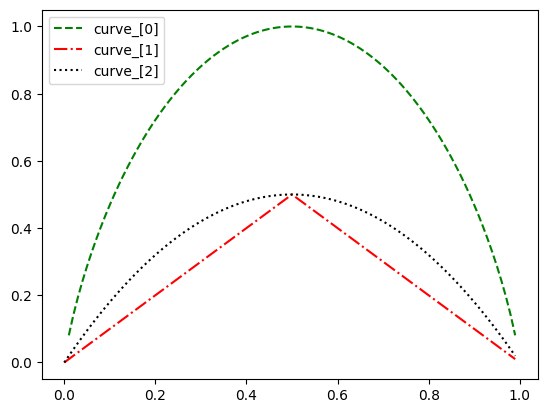

In [26]:
x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p >= 0.0 else None for p in x]
err = [error(p) if p >= 0.0 else None for p in x]
gin =[gini(p) if p >= 0.0 else None for p in x]
curves = [ent, err, gin]
colors = ["green", "red", "black"]
linestyles = ["--", "-.", ":"]
for (index, curve) in enumerate(curves):
    plt.plot(x, curve, color=colors[index], linestyle=linestyles[index], label=f"curve_[{index}]")

plt.legend(loc="upper left")
plt.plot()

In [27]:
data = load_iris()
x_data = np.asarray(data.data[:, [0, 3]])
labels = np.asarray(data.target)
snn = StandardScaler()
x_data_train, x_data_test, label_train, label_test = train_test_split(x_data, labels, test_size=0.3, random_state=0)
snn.fit(x_data_train)
x_data_train_std, x_data_test_std = snn.transform(x_data_train), snn.transform(x_data_test)




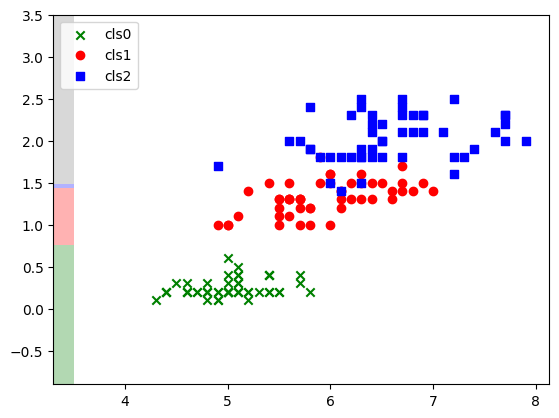

In [28]:
tree_net = DecisionTreeClassifier(criterion="entropy", random_state=0)
tree_net.fit(x_data_train, label_train)
decision_graph(param_x=x_data, labels=labels, classifier=tree_net)


In [29]:
def function(x, y):
    return np.sqrt(x ** 2 + y ** 2)

def derivative_x(delta_x, y):
    return function(delta_x + 0.0000001, y) - function(delta_x, y)

def derivative_y(x, delta_y):
    return function(x, delta_y + 0.0000001) - function(x, delta_y)

def derivative_xy(x, delta_y):
    return derivative_x(x, delta_y + 0.0000001) - derivative_x(x, delta_y)

def derivative_xx(delta_x, y):
    return derivative_x(delta_x + 0.0000001, y) - derivative_x(delta_x, y)

def derivative_yx(delta_x, y):
    return derivative_y(delta_x + 0.0000001, y) - derivative_y(delta_x, y)

def derivative_yy(x, delta_y):
    return derivative_y(x, delta_y + 0.0000001) - derivative_y(x, delta_y)




In [30]:
def stationary_points(function_matrix, x1_param, x2_param):
    result_matrix = np.zeros((function_matrix.shape[1], 3))
    for (index_i, row) in enumerate(function_matrix):
        for (index_j, cols) in enumerate(row):
            if (derivative_xx(x1_param[index_i][index_j], x2_param[index_i][index_j]) * derivative_yx(x1_param[index_i][index_j], x2_param[index_i][index_j]) - \
                (derivative_xy(x1_param[index_i][index_j], x2_param[index_i][index_j]) * derivative_yy(x1_param[index_i][index_j], x2_param[index_i][index_j]))) > 0 or ((derivative_xx(x1_param[index_i][index_j], x2_param[index_i][index_j]) * derivative_yx(x1_param[index_i][index_j], x2_param[index_i][index_j]) - \
                (derivative_xy(x1_param[index_i][index_j], x2_param[index_i][index_j]) * derivative_yy(x1_param[index_i][index_j], x2_param[index_i][index_j])))) < 0:
                result_matrix[index_i] = np.array([x1_param[index_i][index_j], x2_param[index_i][index_j], function_matrix[index_i][index_j]])
                
            elif (derivative_xx(x1_param[index_i][index_j], x2_param[index_i][index_j]) * derivative_yx(x1_param[index_i][index_j], x2_param[index_i][index_j]) - \
                (derivative_xy(x1_param[index_i][index_j], x2_param[index_i][index_j]) * derivative_yy(x1_param[index_i][index_j], x2_param[index_i][index_j]))) >= 0 or ((derivative_xx(x1_param[index_i][index_j], x2_param[index_i][index_j]) * derivative_yx(x1_param[index_i][index_j], x2_param[index_i][index_j]) - \
                (derivative_xy(x1_param[index_i][index_j], x2_param[index_i][index_j]) * derivative_yy(x1_param[index_i][index_j], x2_param[index_i][index_j])))) <= 0:
                pass
    return result_matrix

            


In [31]:
def gradient_points(function_matrix, x1_param, x2_param):
    stat_points = stationary_points(function_matrix, x1_param, x2_param)
    result_matrix = np.zeros((function_matrix.shape[1], 3))
    for (index_i, row) in enumerate(function_matrix):
        for (index_j, cols) in enumerate(row):
            grad = derivative_x(delta_x = x1_param[index_i][index_j], y = x2_param[index_i][index_j]) + derivative_y(x = x1_param[index_i][index_j], delta_y = x2_param[index_i][index_j])
            x = x1_param[index_i][index_j] - stat_points[index_i, 0] * grad
            y = x2_param[index_i][index_j] - stat_points[index_i, 1] * grad
            z = function_matrix[index_i][index_j] - stat_points[index_i, 2] * grad
            result_matrix[index_i] = np.array([x, y, z])
    return result_matrix

            

    

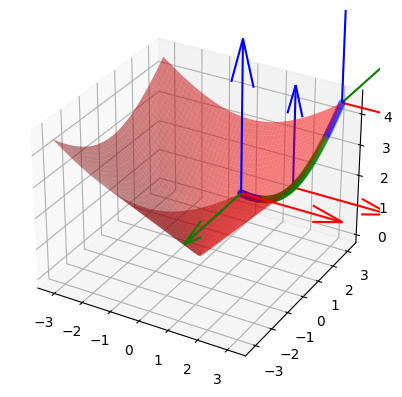

In [32]:
surface = plt.figure().add_subplot(projection="3d")
cmaps = mcolors.ListedColormap(["green", "blue"])
xx1_param, xx2_param = np.meshgrid(np.linspace(-np.pi, np.pi, 100), 
                                   np.linspace(-np.pi, np.pi, 100))
xx3_param = function(xx1_param, xx2_param)
grad = gradient_points(xx3_param, xx1_param, xx2_param)
surface.plot_surface(xx1_param, xx2_param, xx3_param, color="red", alpha=0.5)
surface.scatter(grad[:, 0], grad[:, 1], grad[:, 2], c=grad[:, 2], cmap=cmaps)
surface.quiver(grad[-1, 0], grad[-1, 1], grad[-1, 2], grad[-1, 0] + 1, 0, 0, color="red")
surface.quiver(grad[-1, 0], grad[-1, 1], grad[-1, 2], 0, grad[-1, 1] + 1, 0, color="green")
surface.quiver(grad[-1, 0], grad[-1, 1], grad[-1, 2], 0, 0, grad[-1, 2] + 1, color="blue")
surface.quiver(grad[0, 0], grad[0, 1], grad[0, 2], grad[0, 0], 0, 0, color="red")
surface.quiver(grad[0, 0], grad[0, 1], grad[0, 2], 0, grad[0, 1], 0, color="green")
surface.quiver(grad[0, 0], grad[0, 1], grad[0, 2], 0, 0, grad[0, 2], color="blue")
surface.quiver(grad[50, 0], grad[50, 1], grad[50, 2], grad[50, 0], 0, 0, color="red")
surface.quiver(grad[50, 0], grad[50, 1], grad[50, 2], 0, grad[50, 1], 0, color="green")
surface.quiver(grad[50, 0], grad[50, 1], grad[50, 2], 0, 0, grad[50, 2], color="blue")
plt.show()


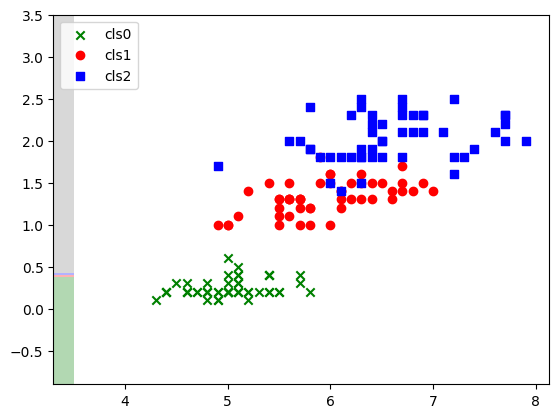

In [33]:
forest = RandomForestClassifier(criterion="entropy", n_estimators=10, 
                               random_state=1, n_jobs=2)
forest.fit(x_data_train_std, label_train)
decision_graph(x_data, labels, classifier=forest)


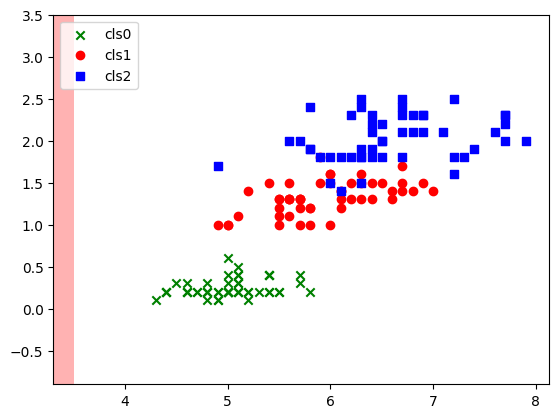

In [34]:
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric="minkowski")
knn.fit(x_data_train_std, label_train)
decision_graph(x_data, labels, classifier=knn)